In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Logistic regression is powerful widely used in industry tool. It can be seen a little bit tricky due to its cost function. However this pays off.

The cornerstone of logistic regression is logistic sigmoid function which is inverse of logit function.
Equation below is sigmoid function, where '-x' is the linear combination of weights we need to find out in order to separate our classes.\
The output of the sigmoid function is interpreted as the probability of a particular example belonging to class 1

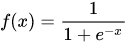

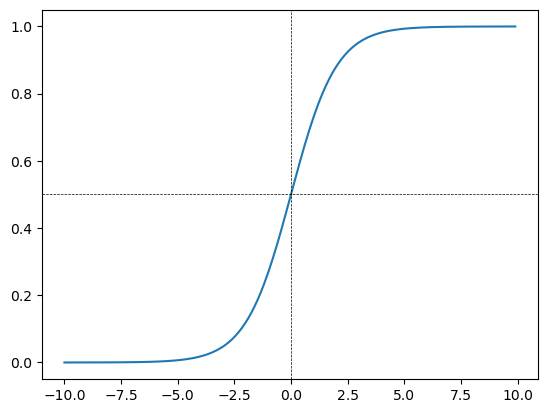

In [2]:
# Sigmoid function
def sigmoid (x):
    return 1.0 / (1.0 + np.exp(-x))

x=np.arange(-10,10,0.1)
f_x=sigmoid(x)
plt.plot(x,f_x)
plt.axvline(0.0,c='black',ls='--',lw=0.5)
plt.axhline(0.5,c='black',ls='--',lw=0.5)
plt.rcParams["figure.figsize"] = (14,7)
plt.show()


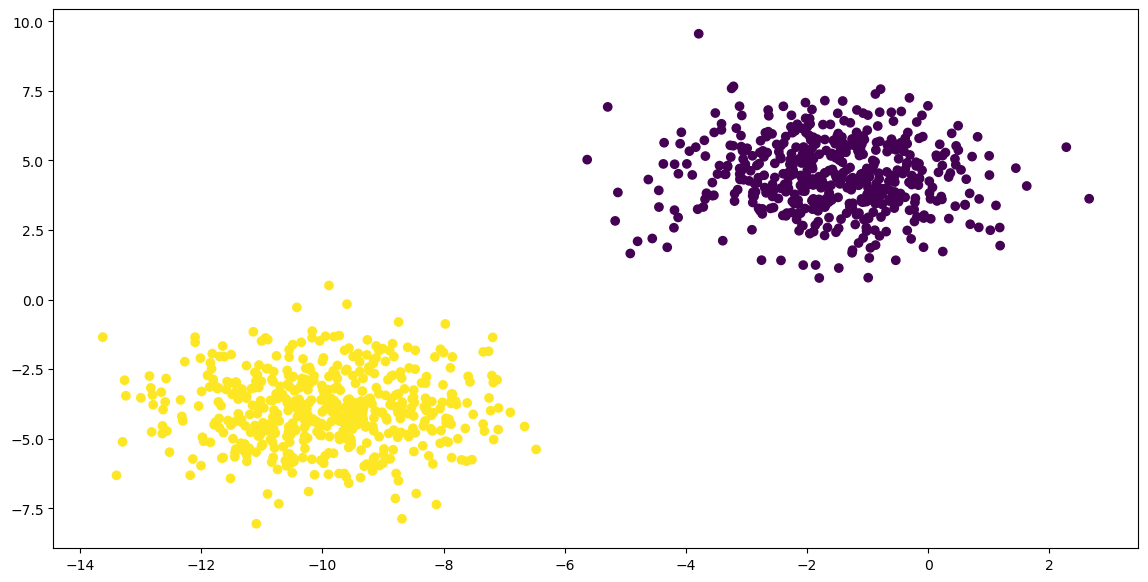

In [52]:
# Toy dataset using sklearn make_blobs function

X,y=make_blobs(n_samples=1000,n_features=2,centers=2,random_state=1,cluster_std=1.3)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [59]:
import math

ix = math.floor(len(X) * 0.7)

X_train=X[: ix]
X_test=X[ix:]
y_train=y[: ix]
y_test=y[ix:]

print('mean_1:',X_train[:,0].mean(),X_test[:,0].mean())

print('mean_2:',X_train[:,1].mean(),X_test[:,1].mean())


mean_1: -5.854531162441044 -5.601957611478799
mean_2: 0.18407987504685053 0.4448245885417468


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression(random_state=0).fit(X_train,y_train)


In [62]:

y_pred=lr.predict(X_test)
print('Misclassifications:',(y_test!=y_pred).sum())

Misclassifications: 0


In [63]:
from sklearn.inspection import DecisionBoundaryDisplay

/tmp/ipykernel_10507/1365338827.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


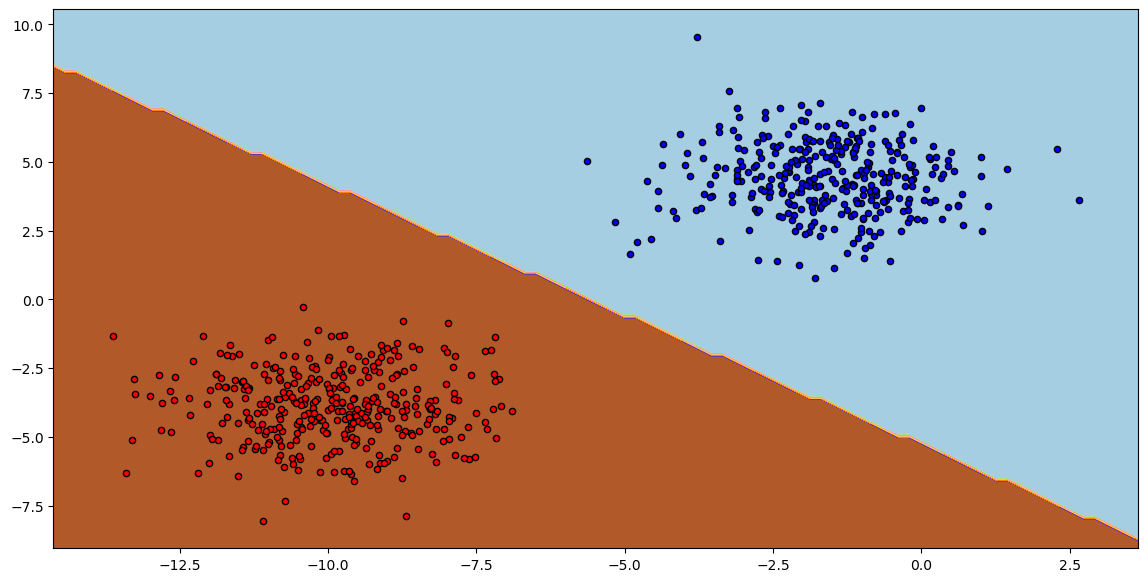

In [64]:
DecisionBoundaryDisplay.from_estimator(
    lr, X_train, response_method="predict", cmap=plt.cm.Paired
)
# Plot also the training points
colors = "bry"
for i, color in zip(lr.classes_, colors):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train[idx, 0], X_train[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
    )